In [4]:
#importing required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#loading and viewing data
fb = pd.read_csv(r"G:\Official\BC_DataScience_Graduate_Programme_2019\dataset_Facebook.csv", sep=';')
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

In [11]:
#replacing missing values with 0
df['like'].fillna(0,inplace=True)
df['share'].fillna(0,inplace=True)
df['Paid'].fillna(0,inplace=True)

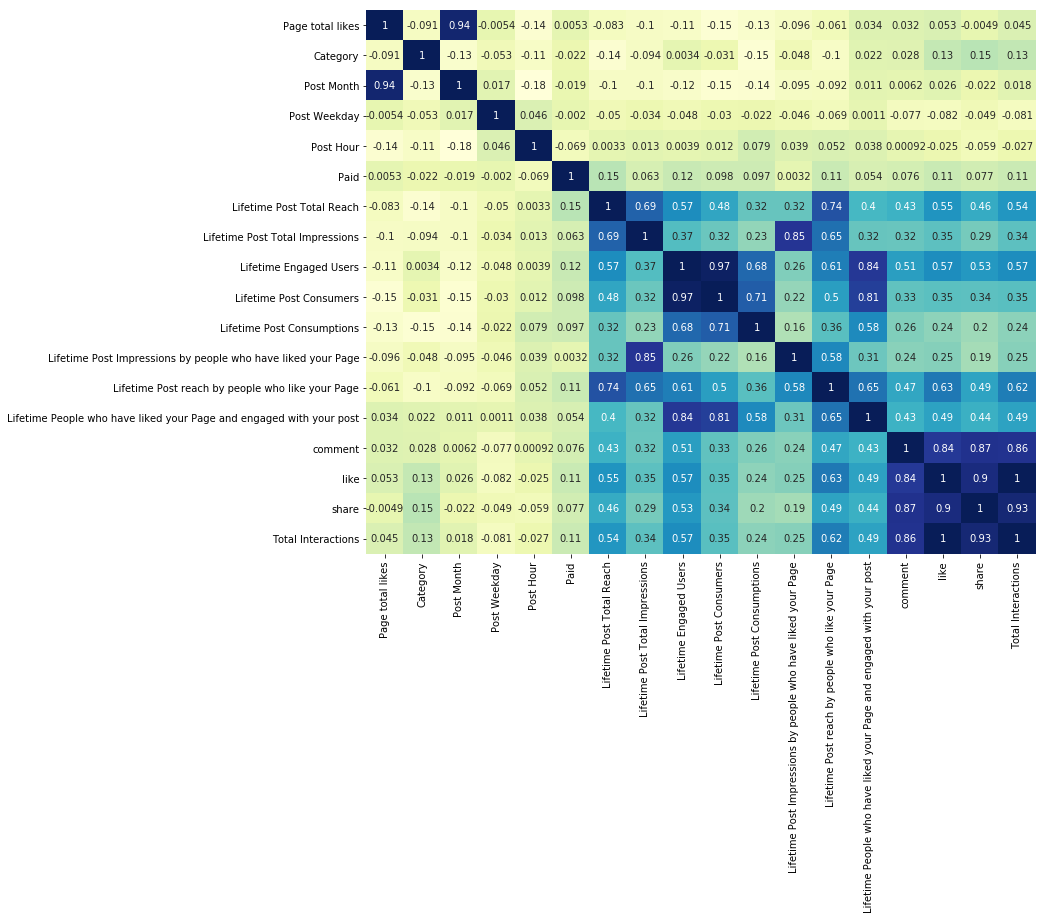

In [17]:
#Exploratory data analysis
plt.figure(figsize=(12,10))
sns.heatmap(fb.corr(),cmap='YlGnBu',annot=True,cbar=False)

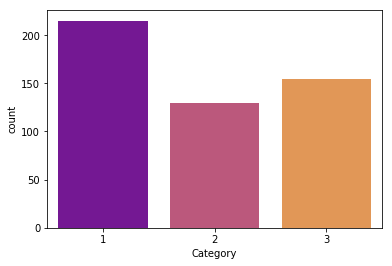

In [20]:
#Time Analysis and Categories
sns.countplot(fb['Category'],palette='plasma')

Text(0.5,1,'Frequency of Posts by Month')

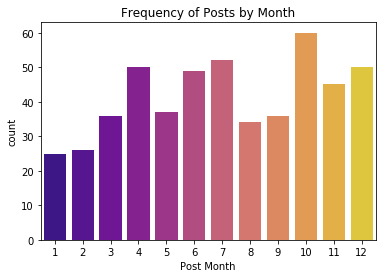

In [24]:
#post by month
sns.countplot(fb['Post Month'],palette='plasma')
plt.title("Frequency of Posts by Month")

Text(0.5,1,'Frequency of Posts by Weekday')

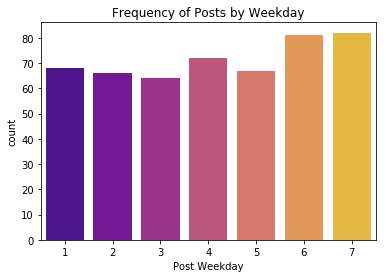

In [25]:
# post by days of a week
sns.countplot(fb['Post Weekday'],palette='plasma')
plt.title("Frequency of Posts by Weekday")

Text(0.5,1,'Frequency of Posts by Hours')

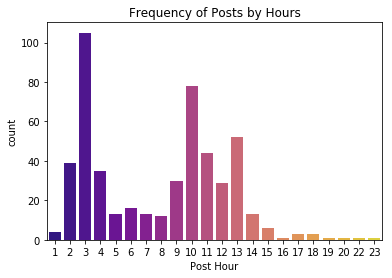

In [27]:
# post by hours of a day
sns.countplot(fb['Post Hour'],palette='plasma')
plt.title("Frequency of Posts by Hours")

Text(0.5,1,'Distribution of Total Interactions by Weekday Posted')

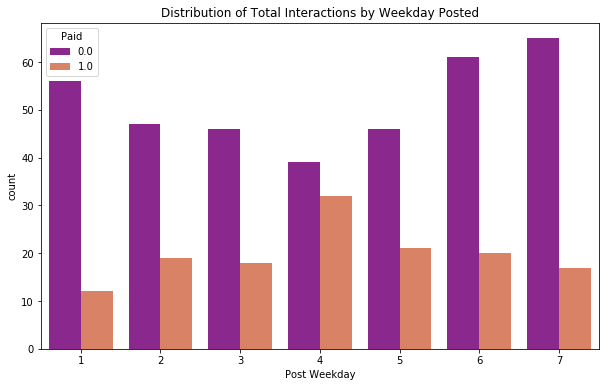

In [29]:
#interactions by days of a week
plt.figure(figsize=(10,6))
sns.countplot(x='Post Weekday',hue='Paid',data=fb,palette='plasma')
plt.title("Distribution of Total Interactions by Weekday Posted")

Text(0.5,1,'Distribution of Total Interactions by Hour Posted')

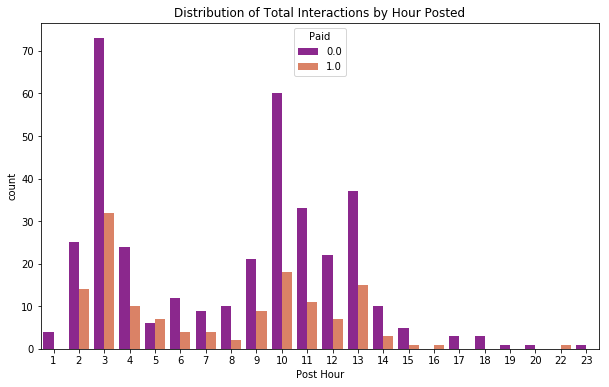

In [30]:
#interactions by hours of a day
plt.figure(figsize=(10,6))
sns.countplot(x='Post Hour',hue='Paid',data=fb,palette='plasma')
plt.title("Distribution of Total Interactions by Hour Posted")

Text(0.5,1,'Distribution of Total Interactions by Month Posted')

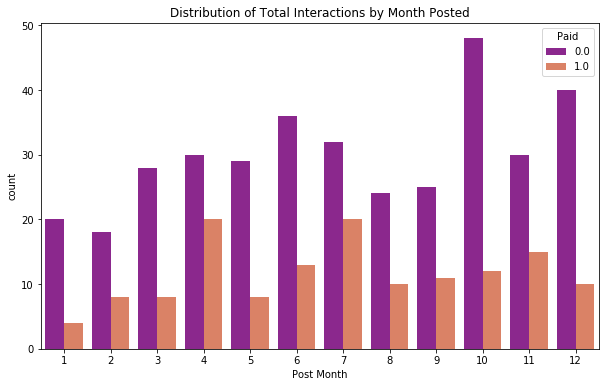

In [32]:
#interactions by month 
plt.figure(figsize=(10,6))
sns.countplot(x='Post Month',hue='Paid',data=fb,palette='plasma')
plt.title("Distribution of Total Interactions by Month Posted")

Text(0.5,1,'Likes vs Post Category')

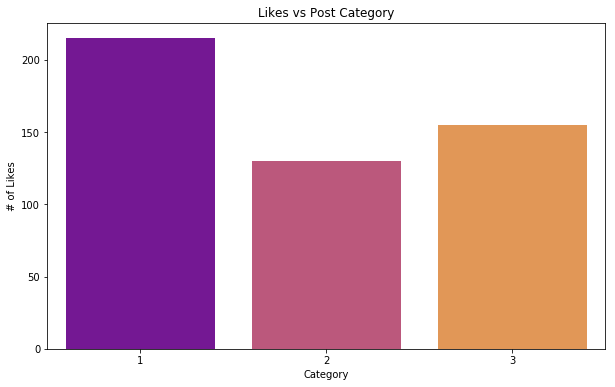

In [34]:
#category likes
plt.figure(figsize=(10,6))
sns.countplot(x='Category',data=fb,palette='plasma')
plt.ylabel("# of Likes")
plt.title("Likes vs Post Category")

Text(0,0.5,'# of likes')

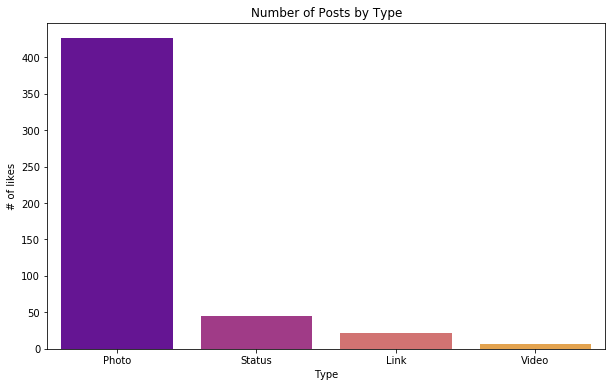

In [36]:
#likes by the type of post
plt.figure(figsize=(10,6))
sns.countplot(x='Type',data=fb,palette='plasma')
plt.title("Number of Posts by Type")
plt.ylabel("# of likes")

Text(0,0.5,'# of Posts')

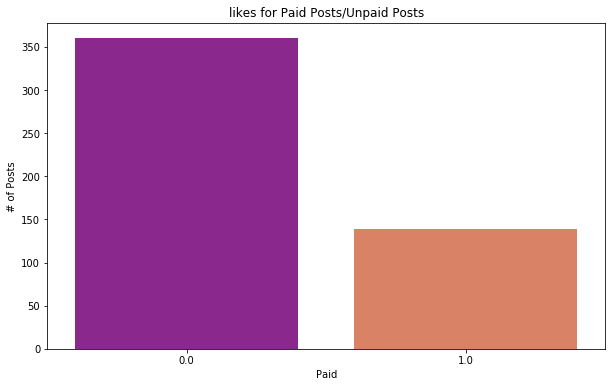

In [41]:
# likes for paid vs unpaid posts
plt.figure(figsize=(10,6))
sns.countplot(x='Paid',data=fb,palette='plasma')
plt.title("likes for Paid Posts/Unpaid Posts")
plt.ylabel("# of Posts")

In [166]:
#importing ml models required to predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [171]:
#float to integer 
le = LabelEncoder()
fb = fb.apply(le.fit_transform)

x = fb[['Category','Page total likes','Paid','Type','Post Month', 'Post Weekday', 'Post Hour']]
y = fb['Lifetime People who have liked your Page and engaged with your post']

In [192]:
#train test split
x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.3,
                                                  random_state=42)

In [193]:
# Linear Regression
Lin = linear_model.LinearRegression()
Lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [194]:
# Linear regression model validation
pred = Lin.predict(x_test)
pred_train = Lin.predict(x_train)

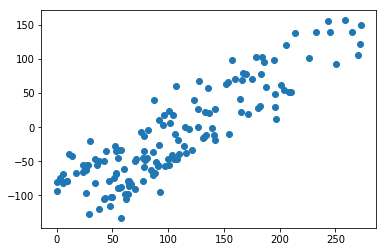

In [195]:
LReg = y_test - pred
plt.scatter(y_test, LReg)

In [198]:
#Linear Regression Train and Test Score
lintestScore = r2_score(y_pred=pred,y_true=y_test)
lintrainScore = r2_score(y_pred=pred_train,y_true=y_train)

linResults = pd.DataFrame()
linResults['Score'] = [lintrainScore,lintestScore]
linResults['Step'] = ['train','test']

linResults

,Score,Step
0,0.160983,train
1,-0.101469,test


In [199]:
# Ridge Regression
ridge = Ridge(normalize=True)
ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [200]:
# Ridge regression model validation
rpred = ridge.predict(x_test)
rpred_train = ridge.predict(x_train)

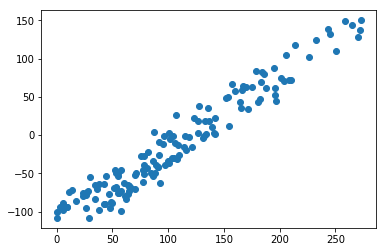

In [201]:
RReg = y_test - rpred
plt.scatter(y_test, RReg)

In [202]:
#Ridge Regression Train and Test Score
ridtestScore = r2_score(y_pred=rpred,y_true=y_test)
ridtrainScore = r2_score(y_pred=rpred_train,y_true=y_train)

ridResults = pd.DataFrame()
ridResults['Score'] = [ridtrainScore,ridtestScore]
ridResults['Step'] = ['train','test']

ridResults

,Score,Step
0,0.122125,train
1,-0.012758,test


In [203]:
#Lasso Regression 
lasso = linear_model.Lasso()
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [204]:
#Lasso regression model validation
lpred = lasso.predict(x_test)
lpred_train = lasso.predict(x_train)

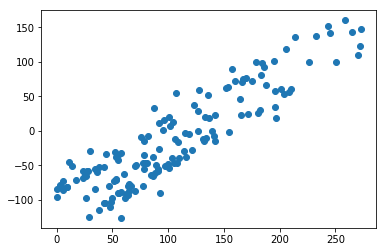

In [205]:
LaReg = y_test - lpred
plt.scatter(y_test, LaReg)

In [206]:
#lasso Regression Train and Test Score
lastestScore = r2_score(y_pred=lpred,y_true=y_test)
lastrainScore = r2_score(y_pred=lpred_train,y_true=y_train)

lasResults = pd.DataFrame()
lasResults['Score'] = [lastrainScore,lastestScore]
lasResults['Step'] = ['train','test']

lasResults

,Score,Step
0,0.158924,train
1,-0.097707,test


In [207]:
#cross validation results
cv_resultsLinearRegression = cross_val_score(Lin, x, y, cv=2)
cv_resultsRidgeRegression = cross_val_score(ridge, x, y, cv=2)
cv_resultsLassoRegression = cross_val_score(lasso, x, y, cv=2)
cv1= np.mean(cv_resultsLinearRegression)
cv2= np.mean(cv_resultsRidgeRegression)
cv3= np.mean(cv_resultsLassoRegression)

In [208]:
cvScore = pd.DataFrame()
cvScore['Model'] = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
cvScore['Score'] = [cv1,cv2,cv3]
cvScore

,Model,Score
0,Linear Regression,0.006308
1,Ridge Regression,0.054429
2,Lasso Regression,0.056725


# Modeling Conclusion:
                        After iterating through three different models using the most important variables and seeing no huge improvement, this suggests the data here could have been better to sufficiently predict features based only on the information here.

# Takeaways
1. Paid posts on average are having higher engagement when compared with the unpaid posts. 
2. Posting on monday and wednesday morning have higher engagement. This should be recomended.
3. 10th month has the highest number of posts in a year.
4. 7th Day has the higher number of posts in a week.
5. A dataset with more information will be better to get higher accuracy.